In [102]:
import numpy as np
import pandas as pd

In [103]:
data = pd.read_csv('../Datasets/IMDB Dataset.csv')
# data = data.iloc[:10]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [104]:
data.shape

(50000, 2)

In [105]:
data['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [106]:
data['review'] = data['review'].str.lower()

In [107]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [108]:
import re

In [109]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [110]:
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

In [111]:
data['review'] = data['review'].apply(remove_html_tags)

data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [112]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [113]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

remove_url(text1)

'Check out my notebook '

In [114]:
data['review'] = data['review'].apply(remove_url)

data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [115]:
import string

In [116]:
def remove_punc1(text):
    exclude = string.punctuation
    return text.translate(str.maketrans('', '', exclude))

remove_punc1(data['review'][5])

'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

In [117]:
data['review'] = data['review'].apply(remove_punc1)

data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [118]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [119]:
chat_words_list = []
chat_words_map_dict = {}
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
        
chat_words_list = set(chat_words_list)

In [120]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


In [121]:
chat_words_conversion("imo this is awesome")

'In My Opinion this is awesome'

In [122]:
data['review'] = data['review'].apply(chat_words_conversion)

data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [123]:
from textblob import TextBlob

In [124]:
def correct_spelling(text):
    blob = TextBlob(str(text))  # Ensure text is treated as string
    return str(blob.correct())

In [125]:
incorrect_text = 'ceertain conditions duriing seveal ggenerations aree moodified in the same maner'

correct_spelling(incorrect_text)

'certain conditions during several generations are modified in the same manner'

In [126]:
# data['review'] = data['review'].apply(correct_spelling)
# 
# data['review']

In [127]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [129]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [130]:
# data['review'] = data['review'].apply(remove_stopwords)
# 
# data['review']

In [131]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [132]:
remove_emoji("Lmao 😂😂")

'Lmao '

In [135]:
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [136]:
# data['review'] = data['review'].apply(emoji.demojize)
# 
# data['review']

In [137]:
# def flatten_review(review):
#     flattened_review = []
#     for sentence in review:
#         flattened_review.extend(sentence)
#     return ' '.join(flattened_review)

In [138]:
# data['review'] = data['review'].apply(flatten_review)
# 
# data['review']

In [139]:
print(data.shape)

(50000, 2)


In [140]:
data.describe()

,review,sentiment
count,50000,50000
unique,49580,2
top,loved todays show it was a variety and not sol...,positive
freq,5,25000


In [142]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [143]:
#split the dataset  

#train dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]

#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [145]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
data['review'] = data['review'].apply(remove_special_characters)

In [144]:
from nltk.tokenize import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()

In [146]:
import nltk

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review'] = data['review'].apply(simple_stemmer)

In [147]:
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'hadn', 'itself', "you've", 'themselves', "shan't", 'am', 'off', "won't", 'he', 'her', 'y', "shouldn't", 'your', 'there', 'll', 'a', 'same', 'my', 'mustn', 'against', 'with', 'until', 'both', "didn't", 'yourselves', 'been', 'this', 'no', 'those', "you'd", "wouldn't", 'needn', 'our', 'through', 'and', "mightn't", "she's", 'because', 'why', 'they', 'into', 'than', 'd', 'wouldn', 'such', 'few', "you'll", 'which', 'again', 'you', 'having', 'an', 'very', 'o', 'own', 'has', 'after', 'each', 'have', 'hers', 'by', 've', "doesn't", 'himself', "hasn't", 'ourselves', 'will', 'between', 'won', 'or', 'what', 'as', 'didn', "should've", 'while', 'couldn', 'his', 'haven', 'out', 'down', 'how', 'when', 'she', 're', 'weren', 'once', 'at', 'the', 'did', 'can', 'mightn', 'during', 'we', 'of', 'from', 'where', 'that', 'whom', 'don', 'had', 'yourself', 'him', "haven't", 'who', "weren't", "you're", 'do', 'yours', 'are', 'all', 'theirs', 'it', 'doing', 'i', "that'll", 'ain', 'to', "needn't", "hadn't", 'ma', 

In [148]:
#normalized train reviews
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [149]:
#Normalized test reviews
norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

**Bags of words model**

It is used to convert text documents to numerical vectors or bag of words.

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6208145)
BOW_cv_test: (10000, 6208145)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

It is used to convert text documents to  matrix of  tfidf features.

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6208145)
Tfidf_test: (10000, 6208145)


In [152]:
from sklearn.preprocessing import LabelBinarizer

#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [153]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [154]:
from sklearn.linear_model import LogisticRegression

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [155]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [157]:
from sklearn.metrics import accuracy_score

#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7519
lr_tfidf_score : 0.75


In [158]:
from sklearn.metrics import classification_report

#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [159]:
from sklearn.metrics import confusion_matrix

#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3769 1238]
 [1243 3750]]
[[3670 1337]
 [1163 3830]]


In [160]:
from sklearn.linear_model import SGDClassifier

#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [161]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [162]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5833
svm_tfidf_score : 0.5112


In [163]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [164]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4947   60]
 [4107  886]]
[[5007    0]
 [4888  105]]


In [165]:
from sklearn.naive_bayes import MultinomialNB

#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [166]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [167]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7511
mnb_tfidf_score : 0.7512


In [168]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.76      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [169]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3733 1274]
 [1215 3778]]
[[3728 1279]
 [1209 3784]]


<function matplotlib.pyplot.show(close=None, block=None)>

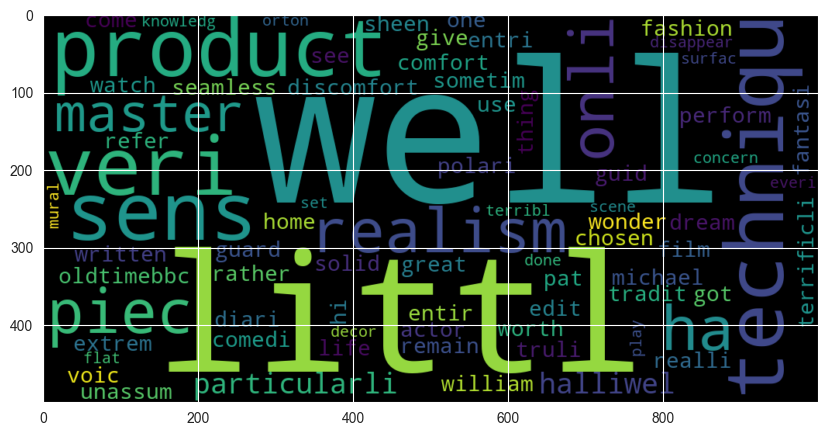

In [171]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

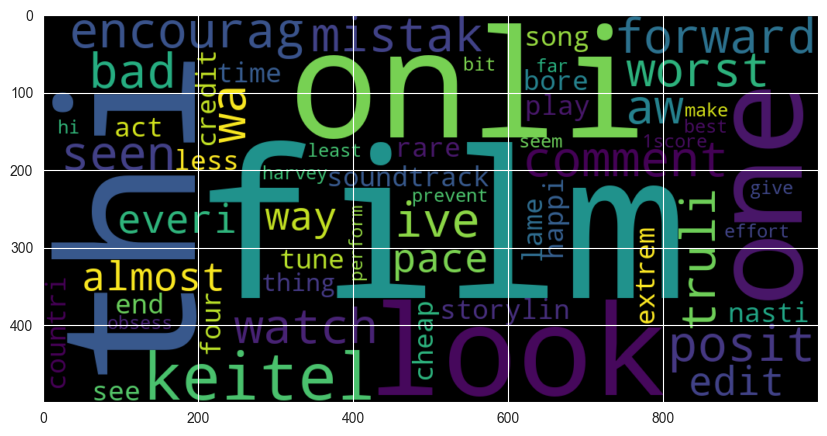

In [172]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [174]:
from textblob import TextBlob

# Example sentence to predict sentiment
sentence = "The film is not good."

# Use TextBlob for sentiment analysis
textblob_analysis = TextBlob(sentence)
textblob_sentiment = textblob_analysis.sentiment.polarity

# Determine sentiment based on polarity
if textblob_sentiment > 0:
    textblob_prediction = 'Positive'
elif textblob_sentiment < 0:
    textblob_prediction = 'Negative'
else:
    textblob_prediction = 'Neutral'  # Handling neutral sentiments

print(f"TextBlob Prediction: {textblob_prediction}")


TextBlob Prediction: Negative


**Tokenization, Stemming & Lemmatizer**

In [175]:
sent1 = "My name is Taha"
sent1.split()

['My', 'name', 'is', 'Taha']

In [177]:
sent2 = "My name is Taha. I am very happy. I live in Pindi. I study in NUML Islamabad"
sent2.split(".")

['My name is Taha',
 ' I am very happy',
 ' I live in Pindi',
 ' I study in NUML Islamabad']

In [178]:
sent_list = []
for sent in sent2.split('.'):
    sent_list.append(sent.split())
sent_list

[['My', 'name', 'is', 'Taha'],
 ['I', 'am', 'very', 'happy'],
 ['I', 'live', 'in', 'Pindi'],
 ['I', 'study', 'in', 'NUML', 'Islamabad']]

In [179]:
sent3 = "I am going to Islamabad!"
sent3.split()

['I', 'am', 'going', 'to', 'Islamabad!']

In [180]:
sent4 = "Where do think I should go? I have 3 day holiday"
sent4.split('.')

['Where do think I should go? I have 3 day holiday']

In [181]:
import re

tokens = re.findall("[\w]+", sent3)
tokens

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Muhammad Taha\AppData\Local\Temp\ipykernel_12940\3612162132.py:3: SyntaxWarning: invalid escape sequence '\w'
  tokens = re.findall("[\w]+", sent3)


['I', 'am', 'going', 'to', 'Islamabad']

In [182]:
text = "My name is Taha. I am very happy. I live in Pindi. I study in NUML Islamabad. My name is Taha. I am very happy. I live in Pindi. I study in NUML Islamabad. My name is Taha. I am very happy. I live in Pindi. I study in NUML Islamabad."

sentences = re.compile('[.!?] ').split(text)
sentences

['My name is Taha',
 'I am very happy',
 'I live in Pindi',
 'I study in NUML Islamabad',
 'My name is Taha',
 'I am very happy',
 'I live in Pindi',
 'I study in NUML Islamabad',
 'My name is Taha',
 'I am very happy',
 'I live in Pindi',
 'I study in NUML Islamabad.']

In [181]:
# import nltk
# nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize

In [182]:
sent1 = 'I am going to visit Islamabad'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'Islamabad']

In [183]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry.',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book.",
 'It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.',
 'It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.']

In [183]:
# import en_core_web_sm
# nlp = en_core_web_sm.load()

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [184]:
# doc1 = nlp(sent4)
# 
# for token in doc1:
#     print(token)

NameError: name 'nlp' is not defined

In [186]:
from nltk.stem.porter import PorterStemmer

In [187]:
ps = PorterStemmer()

def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [188]:
sample = 'walk walks walking walked'
stem_words(sample)

'walk walk walk walk'

In [189]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

stem_words(text)

'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

In [192]:
from nltk.stem import WordNetLemmatizer

In [193]:
le = WordNetLemmatizer()

In [194]:
# import nltk
# nltk.download('wordnet')

In [195]:
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

punctuations="?:!.,;"

sentence_words = word_tokenize(sentence)

for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

print(sentence_words)

print("{0:20}{1:20}".format("Word","Lemma"))

for word in sentence_words:
    print ("{0:20}{1:20}".format(word,le.lemmatize(word,pos='v')))


['He', 'was', 'running', 'and', 'eating', 'at', 'same', 'time', 'He', 'has', 'bad', 'habit', 'of', 'swimming', 'after', 'playing', 'long', 'hours', 'in', 'the', 'Sun']
Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the         